**Exam number**: Y3902375

**Module code and assignment number**: PHY00009M Final Assignment

**Number of pages in pdf**: 20


# Statistical Methods and Data Analysis


# 1.a

In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np # For mathematics, relevant data structure operations, etc.

# Represent the data given in question
measurementError = 3
time = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
distance = np.array([12., 40, 62, 78, 96, 120])

# Print the values as confirmation
print("time =",time)

print("distance =",distance)

time = [1. 2. 3. 4. 5. 6.]
distance = [ 12.  40.  62.  78.  96. 120.]


**Plot of data**

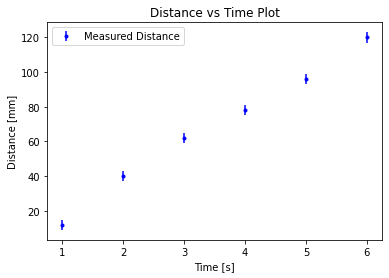

In [2]:
plt.title('Distance vs Time Plot')
plt.xlabel('Time [s]')
plt.ylabel('Distance [mm]')
plt.errorbar(time, distance, yerr=measurementError, fmt=".b", label = "Measured Distance")
plt.legend()
plt.show()

Note that the plot shows the measurement error of 3mm, as per the question.

**Equation to estimate trolley speeds and Necessity of zeroth order**

Since the question says that the speed is constant, the distance would be simply the unknown speed multiplied by time, from basic kinematics.

$$ distance = {speed}\times {time} + distance_{initial} $$

This is a linear function of time (commonly denoted in general linear functions as $x$), with speed being the slope (commonly denoted as $m$) and the initial distance being the constant offset (commonly denoted as $c$).

But given how the question says that the trolley passes through reference for distance measurement ($d=0$) at exactly time $t=0$, we know that: $ distance_{initial} = 0 $ 

Therefore, zeroth order term, or the offset, is not required. Instead, the equation can be:

$$ distance = {speed}\times {time}$$

**Note:**

Note that given how the stroboscope has an error of 3mm, if we know more about this error to conclude that it has an unaccounted zeroth order component (systematic error offset, for instance), then it may justify the use of a zeroth order in the fit model, given how it would be rectified when accounting for the instrumentation. However, it is assumed that all possible known error corrections have already been accounted for in the measurements and the 3mm error is random in nature. Therefore, a zeroth order term (offset is not required).

# 1.b

We can use Python's least squares minimisation to get the estimate of speed (or $m$). We're forcing a 0 intercept to avoid 0th term.

Velocity and uncertainty estimate using least squares fitting (assuming 0 intercept):

In [3]:
from lmfit.models import ExpressionModel

y=distance
x=time
gmod = ExpressionModel("m*x")
result = gmod.fit(y, x=x, m=20)
print(result.fit_report())
m = (result.params['m'].value)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 6
    # variables        = 1
    chi-square         = 78.1098901
    reduced chi-square = 15.6219780
    Akaike info crit   = 17.3981433
    Bayesian info crit = 17.1899028
    R-squared          = 0.98964609
[[Variables]]
    m:  19.6703297 +/- 0.41433089 (2.11%) (init = 20)


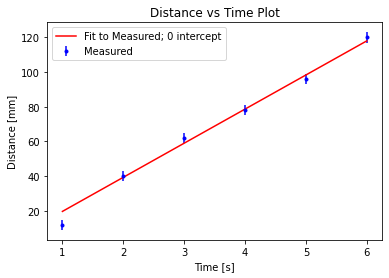

In [4]:
# Plot:
plt.title('Distance vs Time Plot')
plt.xlabel('Time [s]')
plt.ylabel('Distance [mm]')
plt.errorbar(time, distance, yerr=measurementError, fmt=".b", label = "Measured")
plt.plot(time, m*time, color='red', label="Fit to Measured; 0 intercept")
plt.legend()
plt.show()

Velocity determined from this estimation using least squared fitting and its uncertainty:

19.6703297 +/- 0.41433089 (2.11%) mm/s

# 1.c

Analytical solution:
For a straight line fit to a data set $\{x_i,y_i\}$ with common uncertainty $\sigma$ we have $f(x_i;m,c)=m\cdot x_i + c$, and:

$
\chi^2  =  \sum_i \frac{\left(y_i-f(x_i;\vec{a})\right)^2}{\sigma^2} = \sum_i \frac{\left(y_i-mx_i-c\right)^2}{\sigma^2}
$

*However*, as covered earlier, the offset or zeroth term is not necessary given the explicit information available in the question. So this instead becomes:

$
\chi^2  =  \sum_i \frac{\left(y_i-f(x_i;\vec{a})\right)^2}{\sigma^2} = \sum_i \frac{\left(y_i-mx_i\right)^2}{\sigma^2}
$

Differentiating and equating to zero, we get:

$
\left.\frac{d \chi^2}{d m}\right|_{m=\widehat{m}}  =  \frac{1}{\sigma^2}\sum_i -2\left(y_i - \widehat{m}x_i\right)x_i = 0 \\
$

Which becomes:

$ 0  =  \overline{xy} - \widehat{m}\overline{x^2}$

Therefore,
$ \widehat{m} =  \frac{\overline{xy}}{\overline{x^2}} = \frac{\overline{y}}{\overline{x}}$

This is essentially dividing average distance by average time:

$$ \widehat{speed} = \frac{\overline{distance}}{\overline{time}}$$


In [5]:
timeMean=time.mean()
distanceMean=distance.mean()
analyticalM = distanceMean/timeMean

print("Analytical solution from least squares minimisation = ", analyticalM)
print("Difference in python numerical and analytical method for least squares minimisation: ", 100*abs(1-(m/analyticalM)), "%")

Analytical solution from least squares minimisation =  19.428571428571427
Difference in python numerical and analytical method for least squares minimisation:  1.2443438913990246 %


The analytical and numerical solutions are close.

# 1.d

As covered earlier: 

$
\chi^2  =  \sum_i \frac{\left(y_i-f(x_i;\vec{a})\right)^2}{\sigma^2} = \sum_i \frac{\left(y_i-mx_i\right)^2}{\sigma^2}
$

If a zeroth term is included, as covered earlier, the value of $\chi^2$ becomes different:

$
\chi^2  =  \sum_i \frac{\left(y_i-f(x_i;\vec{a})\right)^2}{\sigma^2} = \sum_i \frac{\left(y_i-mx_i-c\right)^2}{\sigma^2}
$

The $\chi^2$ was calculate earlier, and came to a value of 78.1098901. 

**Impact of zeroth term on estimate of speed and uncertainty**

In terms of fit, we can expect that the additional degree of freedom helps get a better fit. It cannot be worse that without the zeroth order term, as zeroth order value of 0 would get us back to the assumption we used.

However, we have prior knowledge that the speed at 0 distance is 0, and that the speed is constant, which would be wrong with a non-zero zeroth order term. The measurement error remains the same, however, and assuming that the measurement error is not systematic in nature such that it's characterised to have a bias or offset in a direction, we can expect the zeroth term to increase uncertainty in this case. 

As we collect more data points, the goodness of fit may get better by sticking to the existing model without zeroth term than one with zeroth term as it may be overfitting with limited data.

# 2.a & 2.b
*Please note that 2.a and 2.b are combined here*

Data Import and processing:

In [6]:
# Library imports for plotting figures and numerical processing
import matplotlib.pyplot as plt 
import numpy as np

# Import file as array
data1 = np.loadtxt("data.txt")

**Arithmetic Mean:**

Analytical Formula:

$$\bar{x}=\frac{1}{N}\sum_i x_i$$

Note: Given large sample set, it is approximated as a "population", but for smaller samples, it would be $N-1$ instead of $N$.

Computational numerical evaluation:

In [7]:
print("Arithmetic Mean of data in data.txt = ", data1.mean())

Arithmetic Mean of data in data.txt =  10.161846952236985


**Standard Deviation:**

Analytical Formula:

$$\sigma(x)=\sqrt{\frac{1}{N} \sum_{i=1}^N (\bar{x}-x_i)^2}$$

Note: This is true for a "population", but for smaller samples, $N$ in the denominator would be replaced by $N-1$.

Computational numerical evaluation:

In [8]:
print("Standard Deviation of data in data.txt = ", np.std(data1,ddof=1))

Standard Deviation of data in data.txt =  1.935189163296128


**Standard Error:**

Analytical Formula:

$$Standard Error (x) = \frac{\sigma}{\sqrt{N}}$$

Note: This is true for a "population", but for smaller samples, $N$ in the denominator would be replaced by $N-1$.

Computational numerical evaluation:

In [9]:
print("Standard Error of the mean of data in data.txt = ", np.std(data1,ddof=1)/np.sqrt(len(data1)))

Standard Error of the mean of data in data.txt =  0.13683853802454132


# 2.b

Please note that the Analytical Formulae for Arithmetic Mean, Standard Deviation and Standard Error are provided above

# 2.c
Plots:

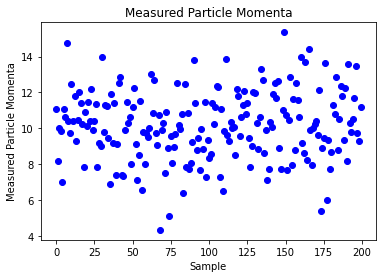

In [10]:
# Plot: Scatter
plt.title('Measured Particle Momenta')
plt.xlabel('Sample')
plt.ylabel('Measured Particle Momenta')
plt.plot(data1, color='blue', marker='o', linestyle='None')
plt.show()

**Scatter plot** does not show obvious signs of data skewing; a histogram chart will help assess it better.

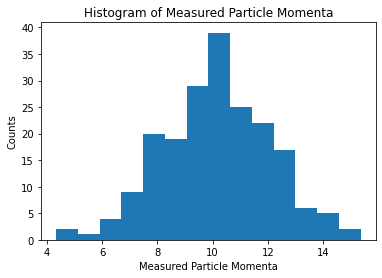

In [11]:
# Plot: Histogram
plt.title('Histogram of Measured Particle Momenta')
plt.xlabel("Measured Particle Momenta")
plt.ylabel("Counts")
nBins=int(np.sqrt(len(data1)))
# nBins = int(2*np.cbrt(len(data1))) # Rice rule
binnedData, lowboundBin, patches=plt.hist(data1, bins =nBins)
plt.show()

In [12]:
from scipy.stats import skew # library package for skew calcs

data1Skew = skew(data1)
print("Skew of data1.dat =", data1Skew) 

Skew of data1.dat = -0.07603210196796277


**Histogram** and the skew calculation reaffirms the observation from scatter plot that the data is distributed without heavy skewing and seems to represent an approximate Gaussian. It may be that the data is truncated at the ends. 

# 2.d

Given the fitting requested is that of a histogram involving counts, we can take the uncertainty for each bin to be $\sqrt{N}$ where $N$ is the counts in each bin. We can also determine the bin positions and use these $x,y$ values in a least squares fit.

In [13]:
# (Based on Practical 3 Answers from SDAM course)

from lmfit.models import ExpressionModel

binnedUnc=[]
xvalues=[]
for i in range(len(binnedData)):
    binnedUnc.append(np.sqrt(binnedData[i]))
    xvalues.append((lowboundBin[i]+lowboundBin[i+1])/2)
    
y=binnedData
x=xvalues
ery=binnedUnc
recery=np.reciprocal(ery)
gmod = ExpressionModel("amp * exp(-(x-cen)**2 /(2*wid**2))/(sqrt(2*pi)*wid)")
result = gmod.fit(y, x=x, amp=50, cen=10, wid=0.2,weights=recery)
print(result.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 14
    # variables        = 3
    chi-square         = 6.91123621
    reduced chi-square = 0.62829420
    Akaike info crit   = -3.88272329
    Bayesian info crit = -1.96555130
    R-squared          = 0.99622514
[[Variables]]
    amp:  152.828616 +/- 8.72279847 (5.71%) (init = 50)
    cen:  10.1940640 +/- 0.11287058 (1.11%) (init = 10)
    wid:  1.93253613 +/- 0.08755019 (4.53%) (init = 0.2)


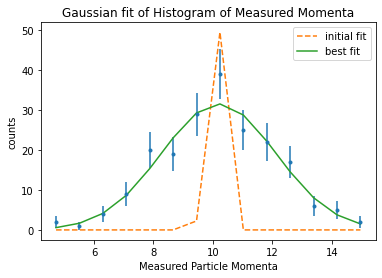

In [14]:
# (Based on Practical 3 Answers from SDAM course)
plt.title('Gaussian fit of Histogram of Measured Momenta')
plt.errorbar(x, y,ery,ls='', marker='.')
plt.plot(x, result.init_fit, '--', label='initial fit')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel('Measured Particle Momenta')
plt.ylabel('counts')
plt.legend()
plt.show()

Based on the fit results:

**Mean** would be the centre, which is 10.1940640 +/- 0.11287058 (1.11%)

**Standard Deviation** would be given by 'wid', which is 1.93253613 +/- 0.08755019 (4.53%)

# 2.e

The mean, standard deviation and error in mean calculated numerically and that determined by assuming that the data can be described by a Gaussian distribution is in good agreement:

|Computation|Numerical result from data|Gaussian fit of Histogram|
|:---|:-------------|:-----------|
|Mean|10.1618470|10.1940640|
|Error in mean|0.13683854|0.11287058|
|Standard deviation|1.93518916|1.93253613|

The square root method was used for binning to ensure that it captured the major characteristics of the distribution visually without having too many to create a combing effect or becoming computationally intensive for the fitting process.


# 3.a.i

For the function to be a PDF, it needs to meet all of the following three criteria:

1. It is positive number everywhere (Not negative); $P(A_j) \ge 0 \;\; \forall \;\; A_j|$
2. It is normalised; $ \sum_jP(A_j) =1$
3. Single valued. If 2 events (Say, $A_1$, $A_2$) are independent, then $P(A_1\&A_2)=P(A_1)P(A_2)$

Regarding allowable values of $f(\phi;A,\sum)$:

We understand that $\phi$ can range from $-\pi$ to $\pi$, which means that $cos(2\phi)$ can range from -1 to 1. For this to be a PDF, we need to normalise it:

$$\int_{-\pi}^{\pi}f(\phi;A,\Sigma)=1.0$$

$$\int_{-\pi}^{\pi}f(\phi;A,\Sigma)=\int_{-\pi}^{\pi}A(1-{\Sigma}cos(2\phi))d\phi$$



$$=A(\phi-\frac{1}{2}{\Sigma}sin2\phi)\large{|}_{-\pi}^\pi\\
=A(\pi-\frac{1}{2}{\Sigma}sin2\pi)-A(-\pi-\frac{1}{2}{\Sigma}sin(-2\pi))\\
=A\pi+A\pi=2A\pi\\
\\
\therefore A=\frac{1}{2\pi}$$

This is the value A needs to be. There doesn't appear to be a constraint for $\Sigma$.



# 3.a.ii

The likelihood function is the product of the individual PDFs

$$
L=\prod_i f(\phi;A,\Sigma)\\
=\prod_i \frac{1}{2\pi}(1-{\Sigma}cos(2\phi))\\
$$



From this the loglikelihood (LL) is

$$LL=\ln\left(\prod_i f(\phi;A,\Sigma)\right)$$

$$=\left(\sum_{i}^{N}{-\ln2\pi}\right) + \left(\sum_{i}^{N}{\ln(1-{\Sigma}cos(2\phi))}\right) $$

Differentiating with respect to ${\Sigma}$ and equating to 0, we get:




$$0 = 0 - \frac{d}{d{\Sigma}}\left(\sum_{i}^{N}{\ln(1-{\Sigma}cos(2\phi))}\right)$$


$$0 = \sum_{i}^{N}\left(\frac{\frac{d}{d{\Sigma}}1 - cos(2\phi)\frac{d}{d{\Sigma}}{\Sigma}}{1 - cos(2\phi){\Sigma}}\right)$$

$$0 = \sum_{i}^{N}\frac{cos(2\phi)}{1-cos(2\phi){\Sigma}}$$


Now, applying Taylor expansion approximation, assuming $\Sigma$ is small:

$$0 = \sum_{i}^{N}cos(2\phi)(1+cos(2\phi){\Sigma})$$

$$0 = {\sum_{i}^{N}{cos(2\phi_i)}}(1 + \hat{\Sigma}{cos(2\phi)})$$

$$0 = \hat{{\Sigma}}{\sum_{i}^{N}{cos^2(2\phi_i)}} + {\sum_{i}^{N}{cos(2\phi_i)}}$$

$$\therefore \hat{{\Sigma}}=-\frac{\sum_{i}^{N}{cos(2\phi_i)}}{\sum_{i}^{N}{cos^2(2\phi_i)}}$$

# 3.a.iii

To show that this is a maximum, the second derivative should be negative at $\sum=\hat{\sum}$:

$$
\frac{\partial^2LL}{\partial \sum^2}=-\sum_{i}^{N}{cos^2(2\phi_i)}
$$

The uncertainty of the MLE from the MVB (Minimum Variance Bound) is given by 

$V(\hat{\sum})\ge\frac{-1}{\frac{d^2 LL}{d\sum^2}\large{|}_{\sum=\hat{\sum}}}$

,which gives a variance:

$
V(\hat{\sum})=\frac{1}{\sum_{i}^{N}{cos^2(2\phi_i)}}
$

The uncertainty is just 
$$\sigma_{\hat{\Sigma}}=\sqrt{V(\hat{\Sigma})} = \frac{1}{\sqrt{\sum_{i}^{N}{cos^2(2\phi_i)}}}$$

# 3.b.i

Data import and processing

In [15]:
# Library imports for plotting figures and numerical processing
import matplotlib.pyplot as plt 
import numpy as np

# Import file as array
data2 = np.loadtxt("Sigma.dat")

In [16]:
cos2Phi = np.cos(2*data2)
cos2PhiSqr = np.square(cos2Phi)
sigmaHat = -np.sum(cos2Phi)/np.sum(cos2PhiSqr)
sigmaHatUnc = 1/np.sqrt(sum(cos2PhiSqr))

print("sigmaHat = ", sigmaHat)
print("sigmaHatUnc = ", sigmaHatUnc)

sigmaHat =  0.14773655891924067
sigmaHatUnc =  0.0063292434034199025


The calculated numerical values for (reduced significant figures to match dataset):

$\hat{\Sigma}$ = 0.147737

$\sigma_{\Sigma}$ (Uncertainty) = 0.00632924

# 3.b.ii



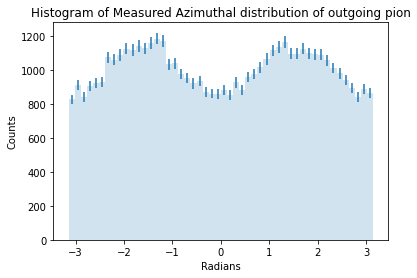

Uncertainty per bin in sequence:  [28.722813232690143, 30.18277654557314, 29.017236257093817, 30.083217912982647, 30.364452901377952, 30.44667469527666, 32.7566787083184, 32.526911934581186, 32.96968304366907, 33.51119216023208, 33.391615714128, 33.734255586866, 33.555923471125034, 34.02939905434711, 34.39476704383968, 34.17601498127012, 32.12475680841802, 32.2335229225724, 31.22498999199199, 30.83828789021855, 30.315012782448235, 30.528675044947494, 29.444863728670914, 29.32575659723036, 29.29163703175362, 29.664793948382652, 29.154759474226502, 30.4138126514911, 29.647934160747187, 30.919249667480614, 31.22498999199199, 31.843366656181317, 32.60368077380221, 33.36165463522455, 33.67491648096547, 34.10278580995987, 33.06055050963308, 33.075670817082454, 33.52610922848042, 33.12099032335839, 33.03028912982749, 33.0, 32.49615361854384, 31.78049716414141, 31.272991542223778, 30.659419433511783, 29.8496231131986, 28.965496715920477, 29.816103031751148, 29.376861643136763]


In [17]:
# Based on SDAM Practicals 4

# Histogram plot
plt.title('Histogram of Measured Azimuthal distribution of outgoing pion')
plt.xlabel("Radians")
plt.ylabel("Counts")
#nBins2=int(np.sqrt(len(data2)))
#nBins2 = int(2*np.cbrt(len(data1))) # Rice rule
#nBins2 = int(1+np.log2(len(data2))) # Sturge's formula
binneddata, binslow, patches=plt.hist(data2,bins=50,lw=0,alpha=.2) 
nonEmptyBins=[]
unc=[]
xbins=[]
for i in range(len(binneddata-1)):
    if binneddata[i]>0:
        nonEmptyBins.append(binneddata[i])
        unc.append(np.sqrt(binneddata[i]))
        xbins.append((binslow[i]+binslow[i+1])/2.0)
                     
plt.errorbar(xbins, nonEmptyBins,unc,fmt="none")
plt.show()

print("Uncertainty per bin in sequence: ", unc)

**Discussion**

The Bin size was manually modified, as the square root method led to clutter and combing pattern making it hard to distinguish error bars. The Rice and Sturge's formula did manage to characterise the distribution visually, but I modified it to suit the size and characteristic of the data such that it allows us to see the patters with high enough resolution to still be able to distinguish features like error bars for each bin.

Since this is based on counting statistics we can take the uncertainty for each bin to be $\sqrt{N}$ where $N$ is the counts in each bin. These are shown in the plot as darker shaded blue error bars, and also printed.

# 3.b.iii

Note: Given the wording of the question, I am assuming that $\sum$ uncertainty, reduced chi-squared are all to be determined by using a least squares fit.

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 50
    # variables        = 2
    chi-square         = 40.6333039
    reduced chi-square = 0.84652716
    Akaike info crit   = -6.37174912
    Bayesian info crit = -2.54770311
    R-squared          = 0.99992997
[[Variables]]
    amp:    999.183226 +/- 4.11298496 (0.41%) (init = 1000)
    Sigma:  0.14696363 +/- 0.00577300 (3.93%) (init = 0.1)


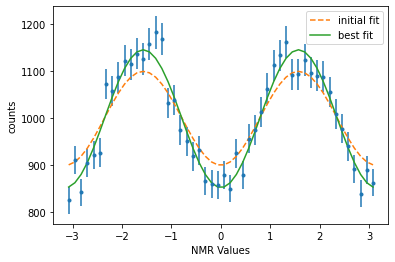

In [18]:
from lmfit.models import ExpressionModel

recery=np.reciprocal(unc)
gmod = ExpressionModel("amp*(1-(Sigma*cos(2*x)))")
result = gmod.fit(nonEmptyBins, x=xbins, amp=1000,Sigma=0.1,weights=recery)
print(result.fit_report())
plt.errorbar(xbins, nonEmptyBins, unc,ls='', marker='.')
plt.plot(xbins, result.init_fit, '--', label='initial fit')
plt.plot(xbins, result.best_fit, '-', label='best fit')
plt.xlabel('NMR Values')
plt.ylabel('counts')
plt.legend()
plt.show()

**RESULTS**
The obtained value for $\Sigma$ is 0.146964 with an uncertainty of 0.00577300.

The reduced chi-square is about 0.85, which indicates a good fit. 

These values also match the previously calculated values quite well.

# 4.a

Given how the experiment described involves a counting nature, over a time interval with an average expected number of events (for a unique experimental setup), the yields can be expected to follow a Poisson distribution. 

If the source has an average rate $\mu$, then the distribution can be expressed as:

$$
P(x,\mu)=\frac{\mu^x e^{-\mu}}{x!}
$$


The distribution is normalised as $\sum_{x=1}^{\infty} \frac{\mu^{x-1} e^{-\mu}}{(x-1)!}=1$, and therefore, it yields $\langle x\rangle=\mu$. 

 



The variance $V(x)=\langle x^2\rangle-\langle x\rangle^2=\mu^2+\mu-\mu^2=\mu$. 

The uncertainty in the measured yield is then $\sigma_Y=\sqrt{V(x)}=\sqrt{\mu}$. 

If one measures a yield of N counts, the uncertainty would be $\sqrt{N}$.

# 4.b


Since the question describes the yields as number of event counts, we can denote the yield (counts) in the polarisation directions as:

$Y^{\perp}$ and $Y^{\parallel}$

The uncertainties for each would be:

${\Delta}Y^{\perp}=\sqrt{Y^{\perp}}$ and ${\Delta}Y^{\parallel}=\sqrt{Y^{\parallel}}$

Since sum and difference both have the same impact on the error, we can use the result above along with error propagation rules to get:

${\Delta}(Y^{\perp} - Y^{\parallel}) = {\Delta}(Y^{\perp} + Y^{\parallel}) = \sqrt{({\Delta}Y^{\perp})^2 + ({\Delta}Y^{\parallel})^2} = \sqrt{Y^{\perp} + Y^{\parallel}}$ 

(Note: This requires the values to be $>=0$, and so does not generically apply to other experiments)

Using the equation for $E$, the result above and the error propagation rules, we can get:

$$
\frac{{\Delta}E}{E} = \sqrt{\left(\frac{\sqrt{Y^{\perp} + Y^{\parallel}}}{(Y^{\perp} - Y^{\parallel})}\right)^2 + \left(\frac{\sqrt{Y^{\perp} + Y^{\parallel}}}{(Y^{\perp} + Y^{\parallel})}\right)^2} \\
=\sqrt{\frac{Y^{\perp} + Y^{\parallel}}{(Y^{\perp} - Y^{\parallel})^2} + \frac{Y^{\perp} + Y^{\parallel}}{(Y^{\perp} + Y^{\parallel})^2}}
$$

This would be the relative uncertainty. For absolute uncertainty it would be:

$$
{\Delta}E = {E}\cdot \sqrt{\frac{Y^{\perp} + Y^{\parallel}}{(Y^{\perp} - Y^{\parallel})^2} + \frac{Y^{\perp} + Y^{\parallel}}{(Y^{\perp} + Y^{\parallel})^2}}
$$

## ---
## End of Submission